In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs
qs.extend_pandas()
import seaborn as sns
from datetime import datetime
import cufflinks as cf
cf.go_offline()
from tvDatafeed import TvDatafeed, Interval
from lightweight_charts import Chart

# username = ""
# password = ""
# tv = TvDatafeed(username, password)

tv = TvDatafeed()
# vx = tv.get_hist(symbol="VX", exchange="CBOE", interval=Interval.in_daily, n_bars=500, fut_contract=1)
# df = vx.copy()
# df = df.drop(columns="symbol")
# df = df.reset_index()
# df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d")
# zero_column = pd.Series(range(len(df)))
# df.insert(0, "Unnamed: 0", zero_column)

if __name__ == '__main__':
    
    chart = Chart()

    vix = tv.get_hist(symbol="VIX", exchange="CBOE", interval=Interval.in_daily, n_bars=10000)

    sma = vix.ta.sma(length=20).to_frame().reset_index().rename(columns={"datetime": "time", "SMA_20": "value"}).dropna()

    vx = vix.drop(columns="symbol").reset_index().rename(columns={"datetime": "date"})
    vx["date"] = pd.to_datetime(vx["date"]).dt.date
    
    chart.set(vx)
    line = chart.create_line()
    line.set(sma)
    # chart.watermark("VX")
    chart.show()

you are using nologin method, data you access may be limited


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs
import pandas_ta as ta
qs.extend_pandas()
import seaborn as sns
from datetime import datetime
import cufflinks as cf
cf.go_offline()
from tvDatafeed import TvDatafeed, Interval
from lightweight_charts import Chart

# tv = TvDatafeed(username, password)
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [3]:
tv.get_hist(symbol="BNPQF5950121", exchange="FINRA")

,symbol,open,high,low,close,volume
datetime,,,,,,
2024-12-06 22:30:00,FINRA:BNPQF5950121,100.99236,101.123,100.99236,101.123,7000000.0
2024-12-10 22:30:00,FINRA:BNPQF5950121,100.74100,100.741,100.74100,100.741,200000.0
2024-12-12 22:30:00,FINRA:BNPQF5950121,100.34200,100.643,100.34200,100.643,1200000.0
2024-12-13 22:30:00,FINRA:BNPQF5950121,99.72500,101.080,99.72500,100.830,1700000.0
2024-12-16 22:30:00,FINRA:BNPQF5950121,99.87700,99.974,99.87700,99.974,10000000.0
2024-12-17 22:30:00,FINRA:BNPQF5950121,99.64100,99.641,99.64100,99.641,600000.0
2024-12-19 22:30:00,FINRA:BNPQF5950121,98.26200,98.442,98.26200,98.442,800000.0
2024-12-20 22:30:00,FINRA:BNPQF5950121,98.38400,98.712,98.38400,98.712,800000.0
2024-12-26 22:30:00,FINRA:BNPQF5950121,97.88800,97.888,97.88800,97.888,200000.0


In [19]:
sample_size = 10000
vx = tv.get_hist(symbol="VX", exchange="CBOE", interval=Interval.in_daily, n_bars=sample_size, fut_contract=1, extended_session=True)
# vxm = tv.get_hist(symbol="VXM", exchange="CBOE", interval=Interval.in_daily, n_bars=sample_size, fut_contract=1, extended_session=True)
vix = tv.get_hist(symbol="VIX", exchange="CBOE", interval=Interval.in_daily, n_bars=sample_size)

In [32]:
vx_open = vx["open"].rename("future")
vx_open.index = vx_open.index.strftime("%Y-%m-%d")
vx_open.index = pd.to_datetime(vx_open.index)

vix_open = vix["open"].rename("index")
vix_open.index = vix_open.index.strftime("%Y-%m-%d")
vix_open.index = pd.to_datetime(vix_open.index)

vix_open = vix_open.reindex(vx_open.index)
pd.concat([vix_open, vx_open], axis=1).loc["2010":].iplot()
spread = vix_open - vx_open
spread.iplot()
spread.mean()

/opt/anaconda3/envs/medina/lib/python3.11/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



-0.6977925412221145

In [64]:
vx.index.strftime("%Y-%m-%d")
trading_date = vx.loc["2020":"2021"].index.strftime("%Y-%m-%d")
trading_date

Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
       ...
       '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='datetime', length=505)

,0
annual_return(%),136.35
annual_volatility(%),43.22
sharpe_ratio,3.31
max_drawdown(%),-16.80


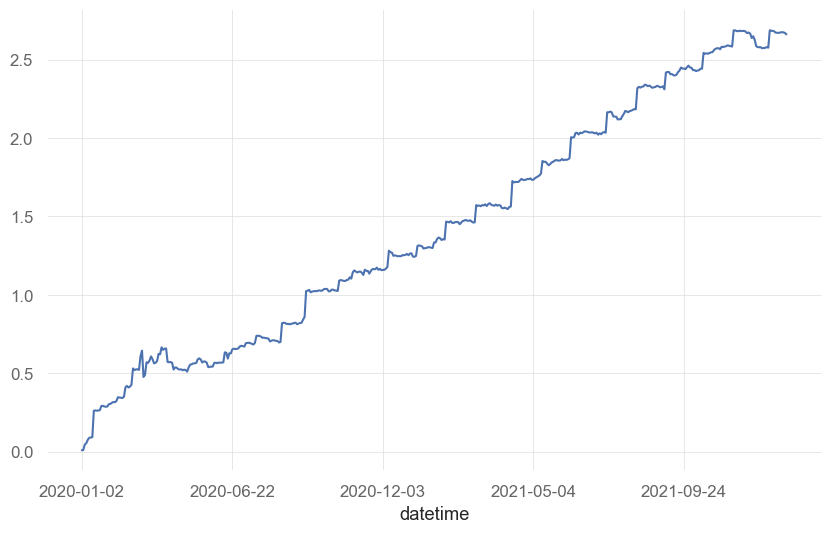

In [136]:
settlement_date = ['2020-01-22', '2020-02-19', '2020-03-18', '2020-04-15', '2020-05-20', 
                   '2020-06-17', '2020-07-22', '2020-08-19', '2020-09-16', '2020-10-21', '2020-11-18', '2020-12-16']

sample = vx.loc["2020":"2021"]
sample_trading_date = sample.index.strftime("%Y-%m-%d")
sample.index = sample_trading_date

date_to_be_deleted = []
for i in settlement_date:
    nloc = sample_trading_date.get_loc(i)
    date_to_be_deleted.extend(sample_trading_date[nloc-1:nloc+2])

new_index = vx_c2o_realized_return.index.strftime("%Y-%m-%d")
vx_c2o_realized_return.index = new_index
stra_ret = vx_c2o_realized_return.loc[sample_trading_date][~sample_trading_date.isin(date_to_be_deleted)]
stra_ret.cumsum().plot()
stra_ret.index = pd.to_datetime(stra_ret.index)
get_performance_stats(stra_ret)

datetime
2004-03-26 07:00:00         NaN
2004-03-29 07:00:00   -0.063089
2004-03-30 07:00:00   -0.002010
2004-03-31 07:00:00   -0.009567
2004-04-01 07:00:00    0.010168
                         ...   
2024-09-19 06:00:00   -0.002646
2024-09-20 06:00:00   -0.042440
2024-09-23 06:00:00   -0.002770
2024-09-24 06:00:00    0.005556
2024-09-25 06:00:00   -0.002762
Name: open, Length: 5157, dtype: float64


,overnight,intraday,open,close
annual_return(%),114.05,-66.80,-30.48,-28.93
annual_volatility(%),38.36,85.79,92.97,93.31
sharpe_ratio,3.05,-1.44,-0.12,-0.09
max_drawdown(%),-13.84,-94.62,-65.94,-66.67


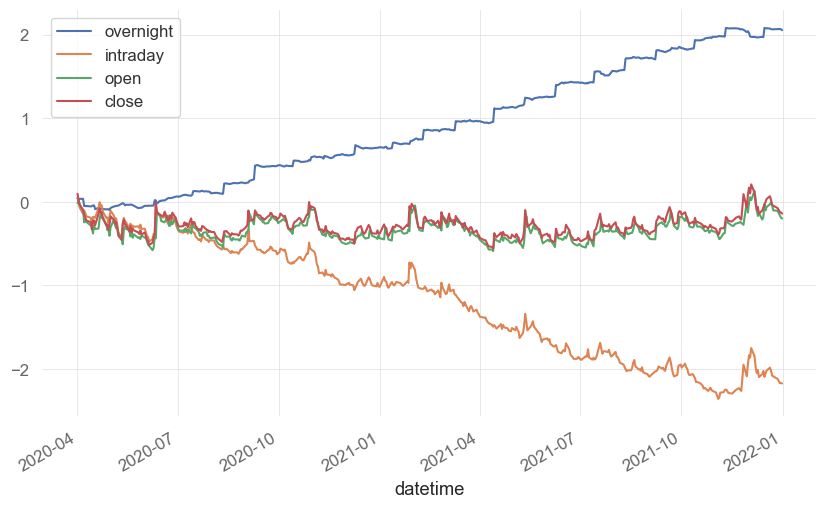

In [130]:
vx_o2o_realized_return = vx["open"].pct_change()
vx_o2o_expected_return = vx_o2o_realized_return.shift(-1)
vx_c2c_realized_return = vx["close"].pct_change()
vx_c2c_expected_return = vx_c2c_realized_return.shift(-1)
vx_c2o_realized_return = (vx["open"]/vx["close"].shift(1) - 1).rename("overnight")
vx_o2c_realized_return = (vx["close"]/vx["open"]-1).rename("intraday")
print(vx_o2o_realized_return)
res = pd.concat([vx_c2o_realized_return, vx_o2c_realized_return, vx_o2o_realized_return, vx_c2c_realized_return], axis=1).loc["2020-4":"2021"]
def get_performance_stats(ret):
    performance_indicators_list = ["annual_return(%)", "annual_volatility(%)", "sharpe_ratio", "max_drawdown(%)"]
    return pd.DataFrame([
        (ret.cagr() * 100).round(2),
        (ret.volatility() * 100).round(2),
        (ret.sharpe()).round(2),
        (ret.max_drawdown() * 100).round(2)
    ], index=performance_indicators_list)
res.cumsum().plot()
get_performance_stats(res)

In [5]:
# 假設 df 是你的數據，其中包含 'close' 欄位
df = pd.DataFrame(vx["close"])
ret = df["close"].pct_change().shift(-1)
# df
df['RSI'] = ta.momentum.rsi(df['close'], window=14)

# 根據 RSI 值產生買入和賣出信號
df['buy_signal'] = df['RSI'] < 25
df['sell_signal'] = df['RSI'] > 55
# pd.concat([df['buy_signal'], df['sell_signal']], axis=1)

In [6]:
position = pd.Series([0]*len(ret.index), index=ret.index)
for i in range(0, len(ret.index)):
    if df["buy_signal"].iloc[i] == True:
        position.iloc[i] = 1
    elif df["sell_signal"].iloc[i] == True:
        position.iloc[i] = 0
    else:
        position.iloc[i] = position.iloc[i-1]

<Axes: xlabel='datetime'>

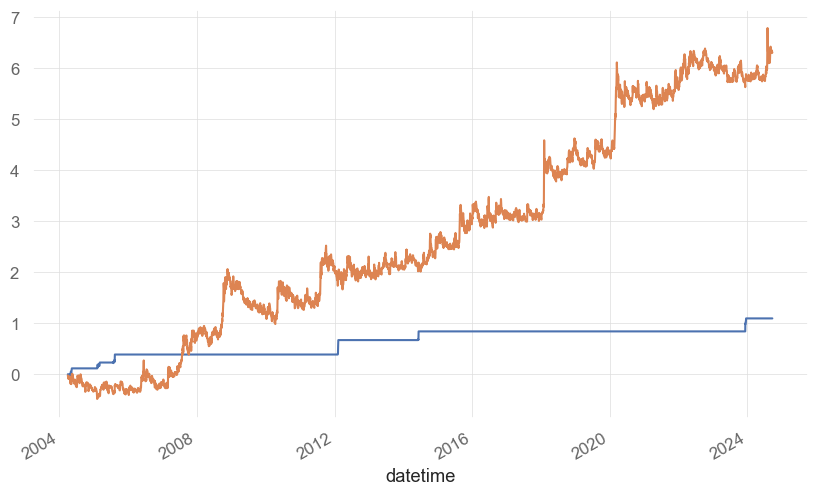

In [15]:
strategy_return = (ret * position).shift(1)
strategy_return.cumsum().plot()
ret.shift(1).cumsum().plot()

In [5]:
ticker = "AMD"
data = yf.Ticker(ticker)
df = data.history(period="1y")

In [ ]:
df = df.reset_index().loc[:, ["date", "open", "high", "low", "close", "volume"]]
df.columns = df.columns.str.lower()
df = df.loc[:, ["date", "open", "high", "low", "close", "volume"]]
df
# chart = Chart()
# chart.set(df)
# chart.show()

In [ ]:
df = vx.copy()
df = df.drop(columns="symbol")
df = df.reset_index()
df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d")

zero_column = pd.Series(range(len(df)))
df.insert(0, "", zero_column)
df.rename(columns={"datetime": "date"}, inplace=True)
# for col in df.columns:
#     print(type(df[col][0]))

display(df)
df.to_csv('output.csv', index=False)
# print()
# df2 = pd.read_csv("ohlcv.csv")

# df2.rename(columns={'Unnamed: 0': 'order'}, inplace=True)
# for col in df2.columns:
#     print(type(df2[col][0]))

# display(df2)
# if __name__ == "__main__":

#     chart = Chart()
    
#     chart.set(df)
#     chart.show(block=True)

In [ ]:
op = vx["open"].loc["2007":]
min_para = 5
ret = op.pct_change()
d = pd.Series()
for i in range(min_para, 201):
    ma = op.rolling(i).mean()
    d[i] = (ret.shift(-1))[op<ma].shift(1).mul(1).cagr()
d.plot(), d.mean()

In [ ]:
# index
# vix_index_data = tv.get_hist(symbol='VIX', exchange='CBOE', interval=Interval.in_daily, n_bars=10)

# futures continuous contract
# vx_futures_data_1 = tv.get_hist(symbol='VX', exchange="CBOE", interval=Interval.in_daily, n_bars=1000, fut_contract=1)
# vx_futures_data_2 = tv.get_hist(symbol="ES", exchange="CME_mini", interval=Interval.in_daily, n_bars=1000, fut_contract=1, extended_session=False)
# vx_futures_data_3 = tv.get_hist(symbol="ES", exchange="CME_mini", interval=Interval.in_daily, n_bars=1000, fut_contract=1, extended_session=True)

# future
tv.get_hist(symbol="DX", exchange="ICEUS", interval=Interval.in_daily, fut_contract=1)


# downloading data for extended market hours
# extended_price_data = tv.get_hist(symbol="EICHERMOT",exchange="NSE",interval=Interval.in_1_hour,n_bars=500, extended_session=False)

In [ ]:
# for non-future
tv.get_hist(symbol="MCHP", exchange="NASDAQ", interval=Interval.in_daily)